In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from imageio import imread, imwrite
from flowlib import read_flow

Reading 480 x 640 flo file


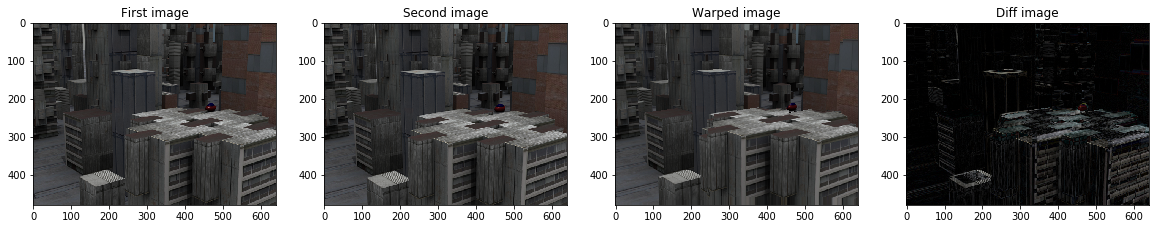

In [3]:
def forward_warp_tf(data_path, image_a_name, image_b_name, flow_name):
    image_a = imread(data_path+image_a_name) / 255.0
    image_b = imread(data_path+image_b_name) / 255.0
    flow = read_flow(data_path+flow_name)

    # make them 4D matrices to pass to a tensorflow graph
    image_a = np.expand_dims(image_a, 0)
    image_b = np.expand_dims(image_b, 0)
    flow = np.expand_dims(flow, 0)

    # make the graph
    first_image_ph = tf.placeholder(shape=image_a.shape, dtype=tf.float32)
    flow_ph = tf.placeholder(shape=flow.shape, dtype=tf.float64)
    warped_tensor = tf.contrib.image.dense_image_warp(first_image_ph, flow_ph)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        warped_image = sess.run(warped_tensor, feed_dict={first_image_ph: image_b, flow_ph: flow})

    # write warped image
    imwrite(data_path+'frame_0010_warped.png', np.uint8(warped_image[0]*255.0))

    # absolute difference between second image and warped one
    diff_image = np.abs(image_b[0] -  warped_image[0])
    imwrite(data_path+'diff.png', np.uint8(diff_image*255.0))

    # plot the result
    fig = plt.figure(figsize=(20, 20))
    plt.subplot(1, 4 ,1)
    plt.imshow(image_a[0])
    plt.title("First image")

    plt.subplot(1, 4 ,2)
    plt.imshow(image_b[0])
    plt.title("Second image")

    plt.subplot(1, 4 ,3)
    plt.imshow(warped_image[0])
    plt.title("Warped image")

    plt.subplot(1, 4 ,4)
    plt.imshow(diff_image)
    plt.title("Diff image")
    
    
# read a Middlebury example
data_path = './data/middlebury-Urban2/'
image_a_name = 'frame_0010.png'
image_b_name = 'frame_0011.png'
flow_name = '/frame_0010.flo'
forward_warp_tf(data_path, image_a_name, image_b_name, flow_name)

In [ ]:
print(image_a.dtype)
print(np.min(warped_image),"  ", np.max(warped_image))
print(np.min(image_b),"  ", np.max(image_b))